# EDA

## 1. Import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/drive/MyDrive/Pacmann Academy/Supply Chain Analytics/Demand Forecasting/Forecasting Dataset.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-09-06 00:00:00,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-09-06 00:00:00,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


## 2. Get Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

## 3. Get Numerical Column Description

Goals: To know the numerical properties of each column and find is there any anomalies in the data.

Anomaly example:
1. Max or Min Value doesn't make any sense
2. Numbers too high or too low
3. Etc.

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


## 4. Checking null values

Goals: To find is there any missing value and how to manipulate these data, for example by dropping the row, or replace the missing value

In [5]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


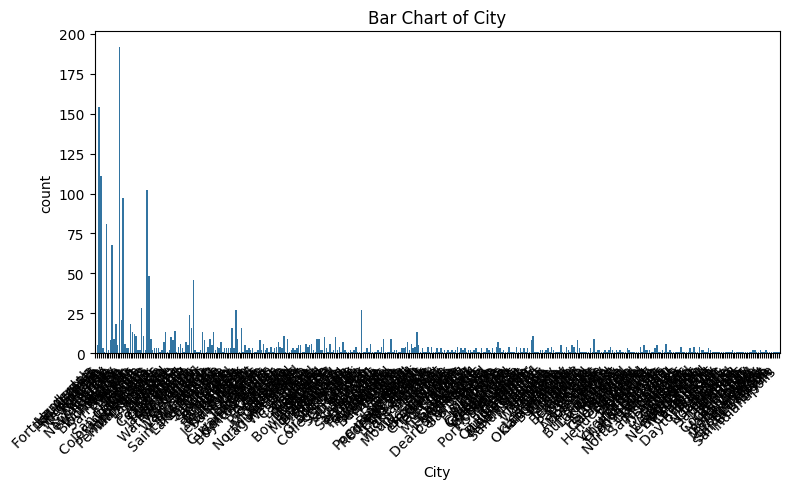

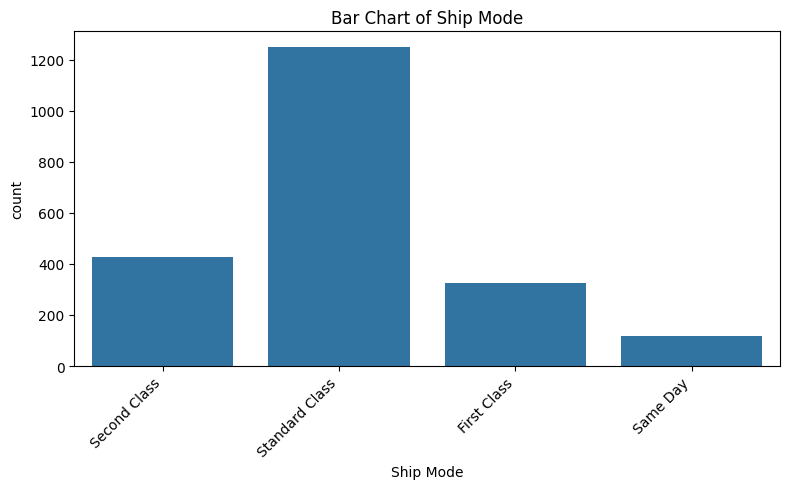

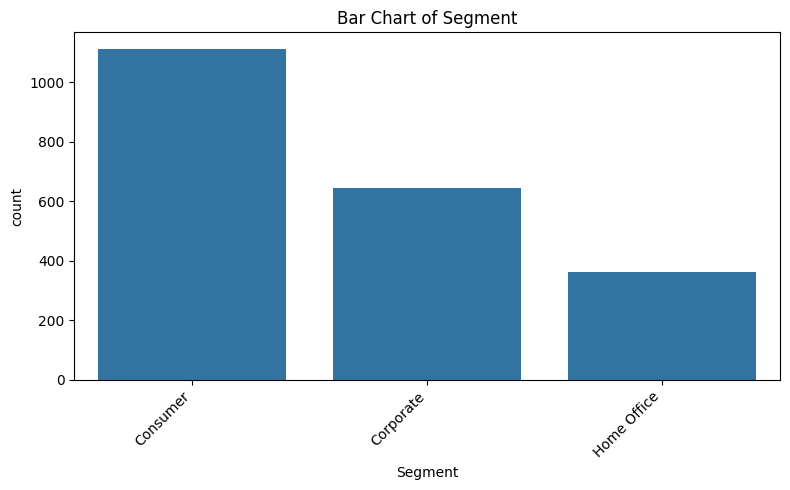

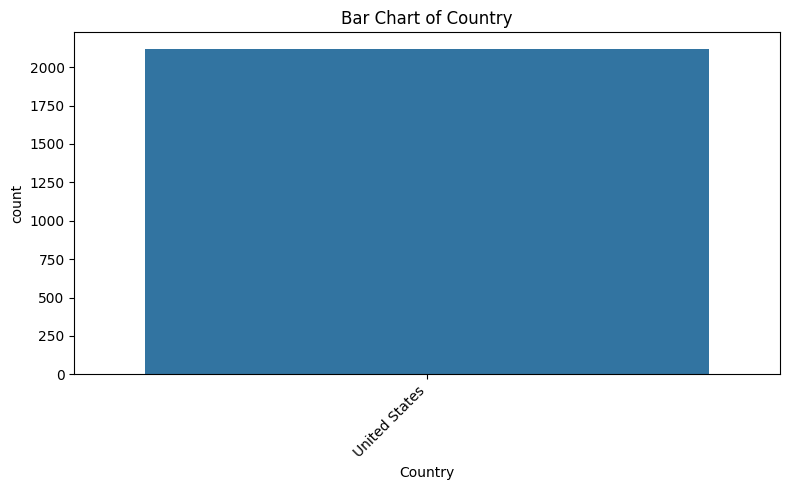

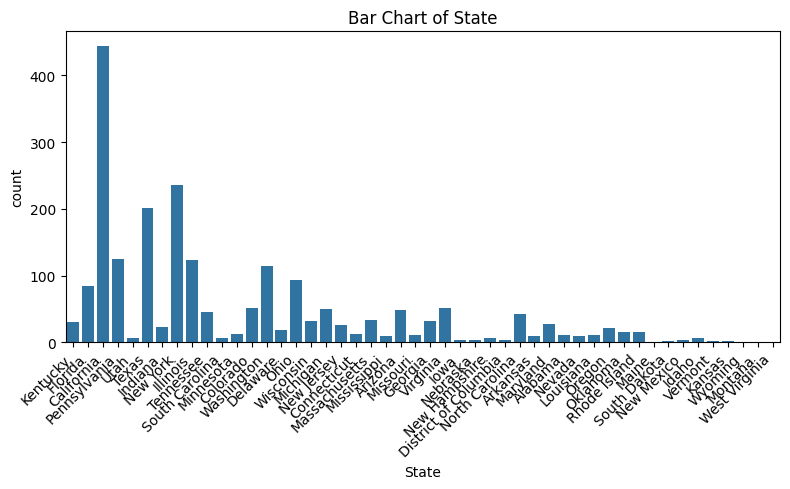

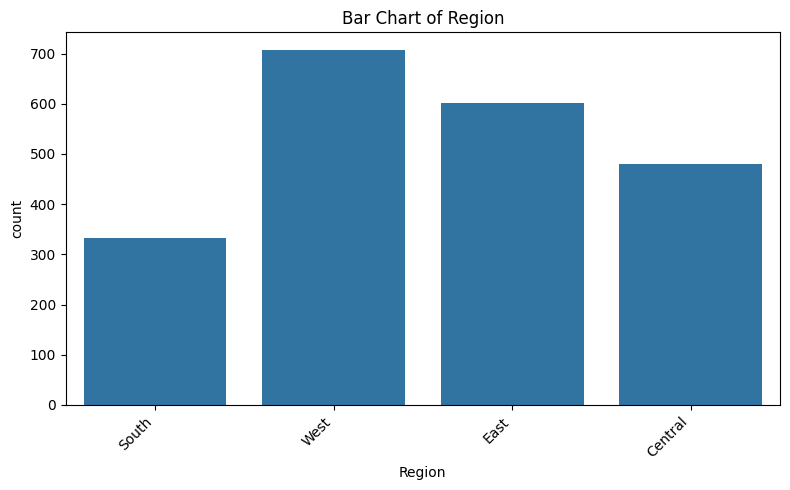

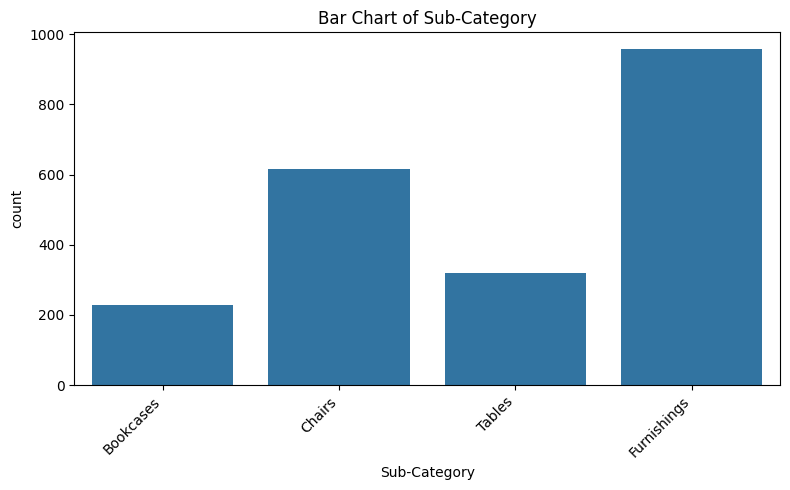

In [6]:
# Identify categorical columns
categorical_cols = ('City','Ship Mode','Segment','Country','State','Region','Sub-Category')

# Loop through categorical columns and create bar charts
for col in categorical_cols:
  plt.figure(figsize=(8, 5))  # Adjust figure size as needed
  sns.countplot(x=col, data=df)
  plt.title(f'Bar Chart of {col}')
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show()

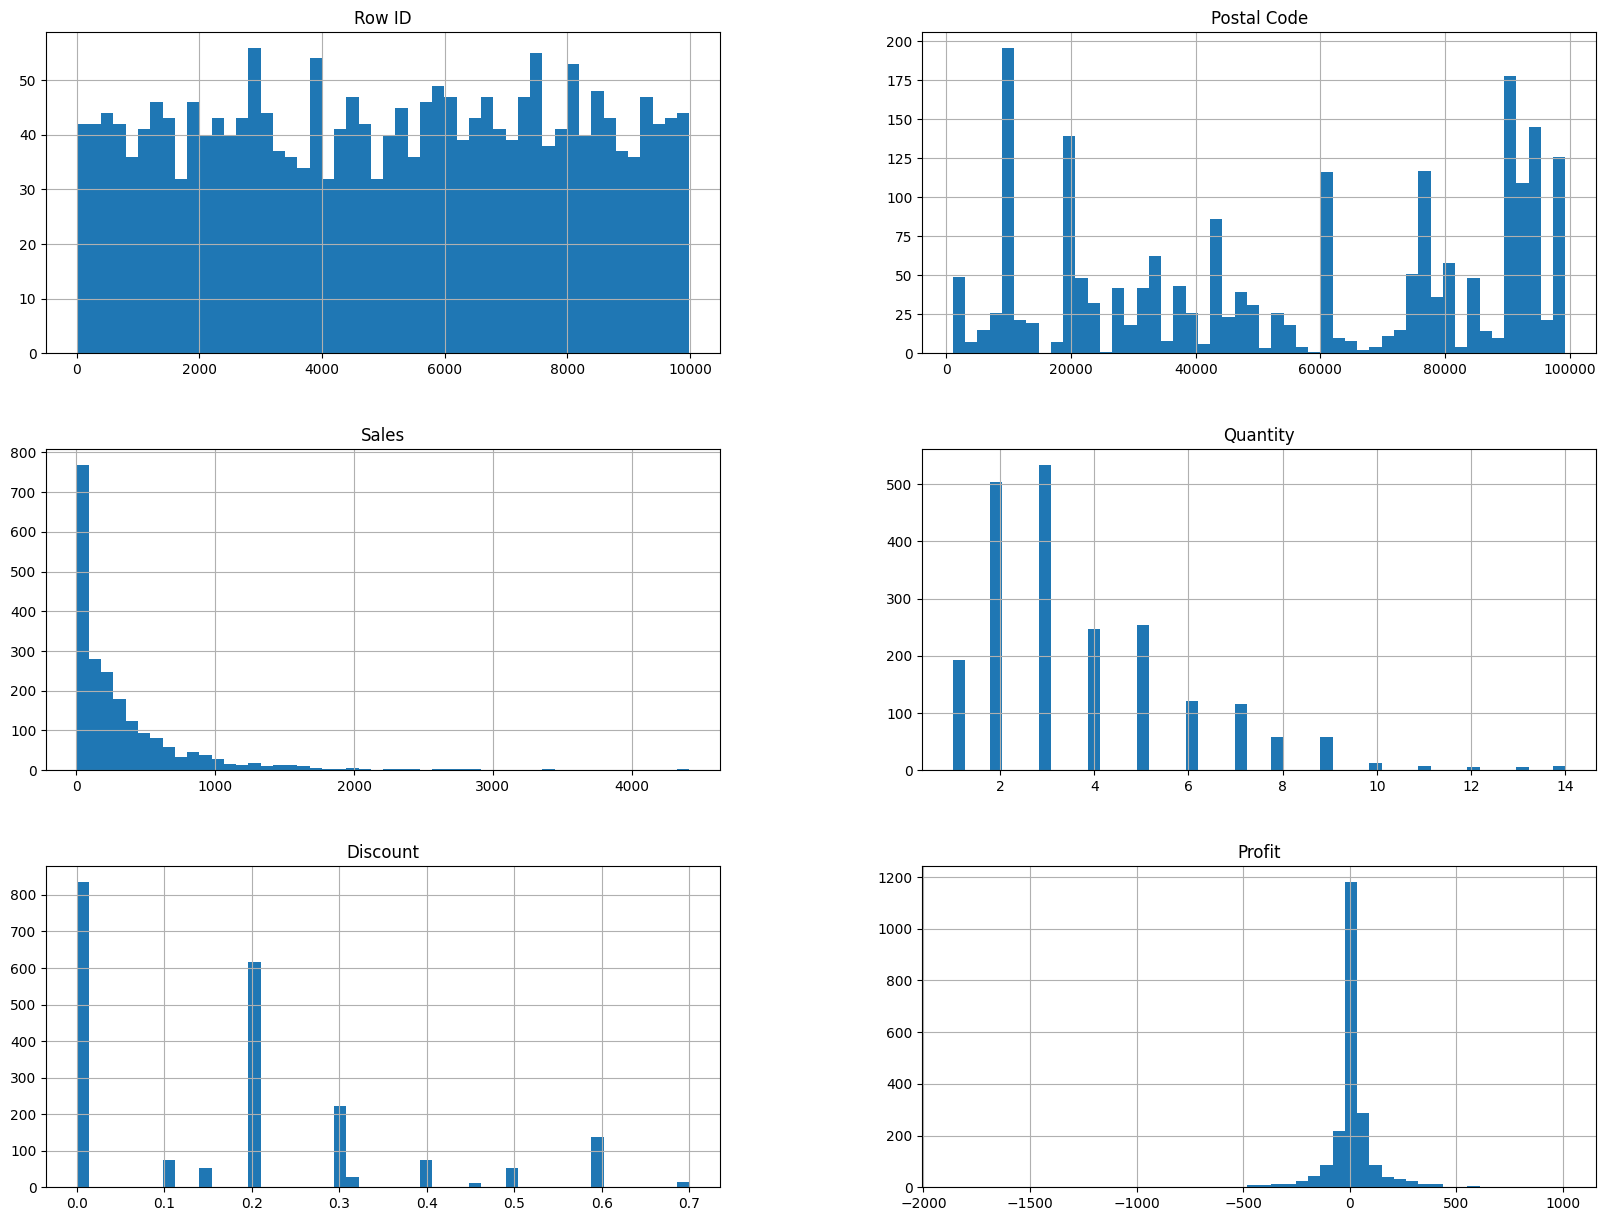

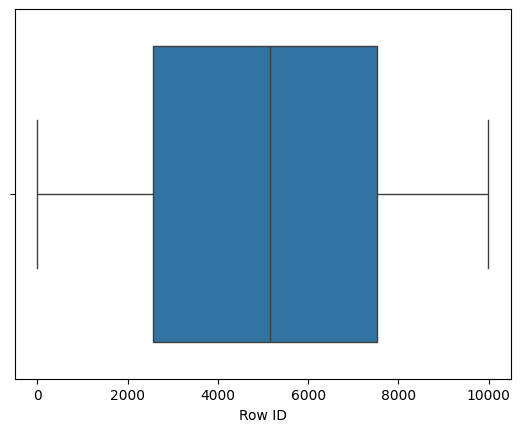

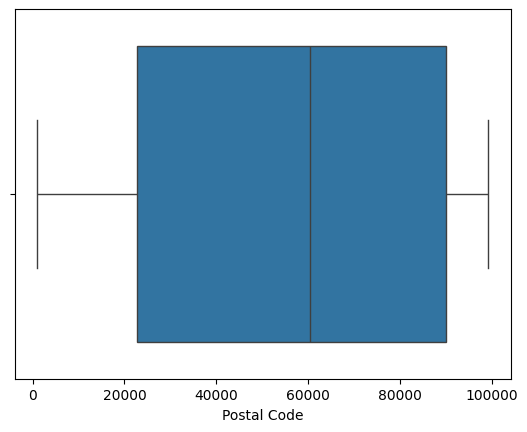

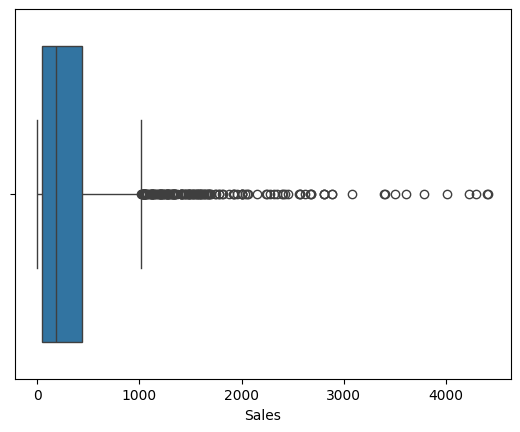

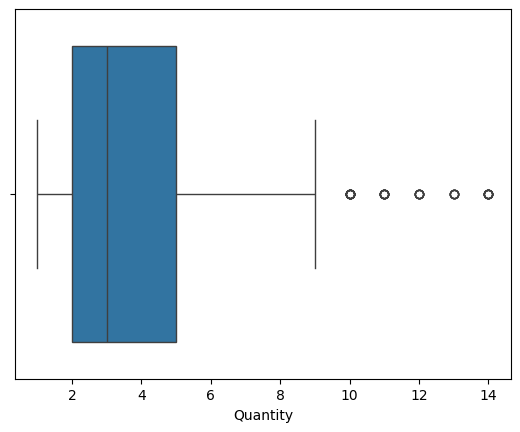

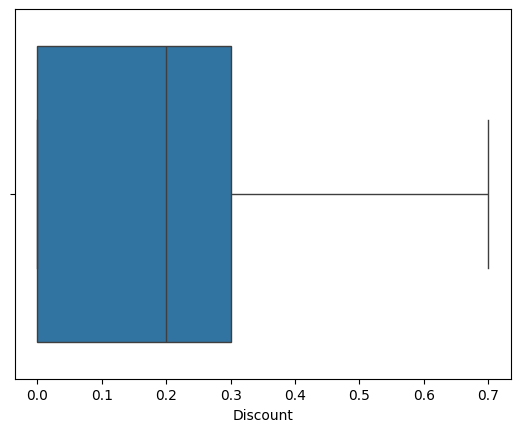

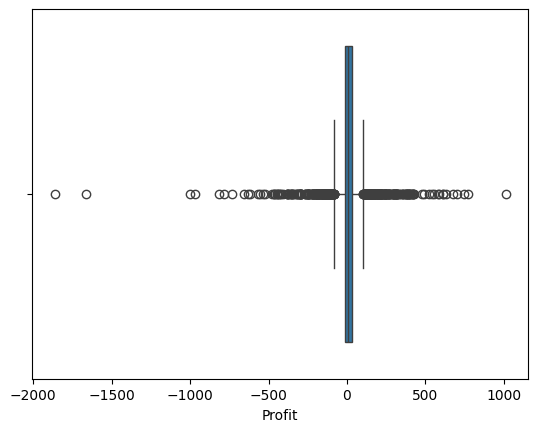

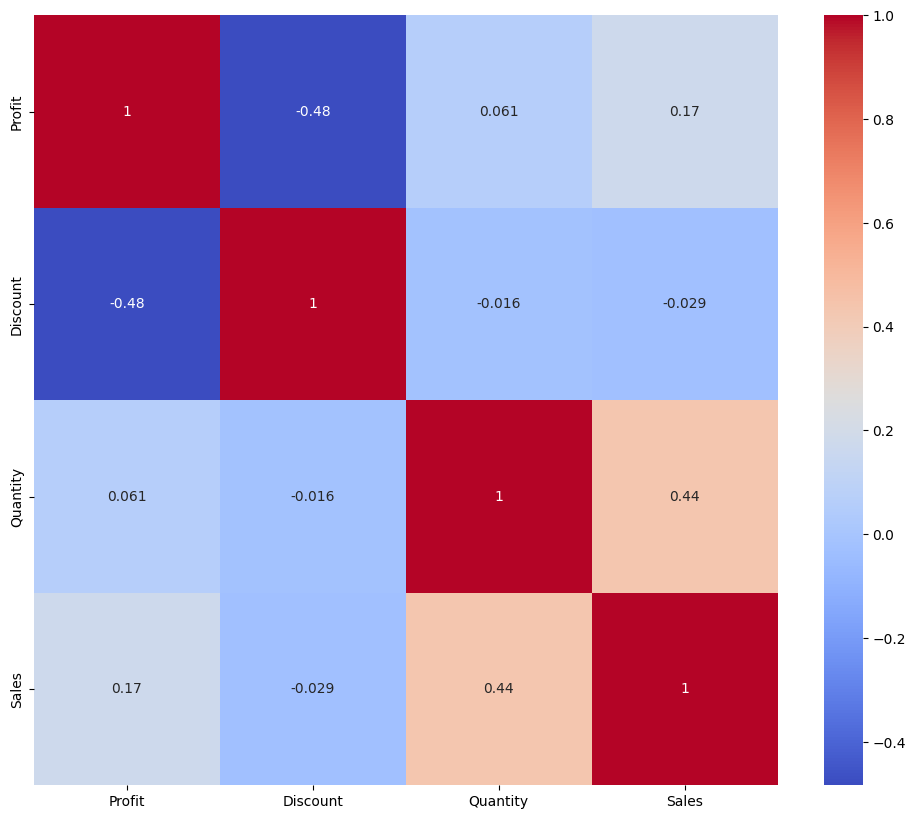

In [7]:
# Explore data visually
# Histograms for numerical features
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Box plots for numerical features
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()


# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[['Profit','Discount','Quantity','Sales']].corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairplot to visualize relationships between features
# Only apply pairplot if the number of columns is not too large
if len(df.columns) <= 10:  # Adjust the threshold as needed
    sns.pairplot(df)
    plt.show()


# Additional EDA steps can be added here based on your specific needs,
# e.g., checking for outliers, analyzing categorical features, etc.


## Pre-processing
Since the data is too granular in daily level, we can pre process to group each data in weekly/monthly level


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

daily_agg_overall = df.groupby(['Order Date'])[['Sales','Discount','Profit','Quantity']].sum().reset_index()
daily_agg_overall.head()

,Order Date,Sales,Discount,Profit,Quantity
0,2014-01-03,1893.995,1.7,-198.6240,23
1,2014-01-06,2024.060,0.0,589.6414,13
2,2014-01-08,44.128,0.2,12.1352,4
3,2014-01-11,100.384,0.2,26.1380,8
4,2014-01-12,4513.606,0.8,651.4054,27


In [9]:
monthly_agg_overall = daily_agg_overall.set_index('Order Date').resample('M').sum()
monthly_agg_overall.head()

/tmp/ipython-input-3203613850.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_agg_overall = daily_agg_overall.set_index('Order Date').resample('M').sum()


,Sales,Discount,Profit,Quantity
Order Date,,,,
2014-01-31,12106.270,5.00,1169.0875,130
2014-02-28,1739.330,2.00,22.0197,50
2014-03-31,14412.058,8.10,-1524.5706,128
2014-04-30,6827.180,2.90,159.9020,76
2014-05-31,5856.862,5.25,284.9670,86


## Find General Pattern

### Sales Monthly Pattern

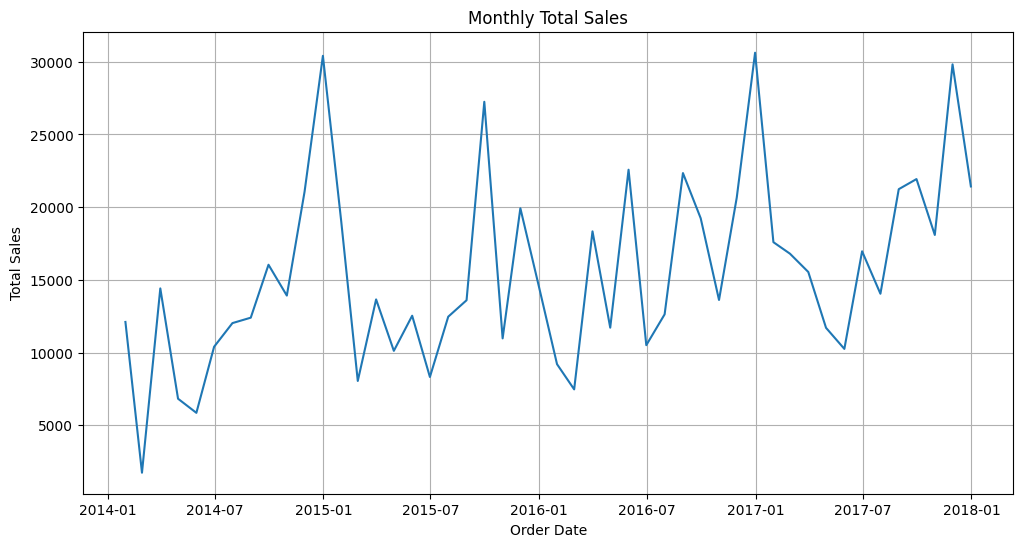

In [10]:
# Plot Sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_agg_overall.index, monthly_agg_overall['Sales'])
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales')
plt.grid(True)
plt.show()

### Profit Monthly Pattern

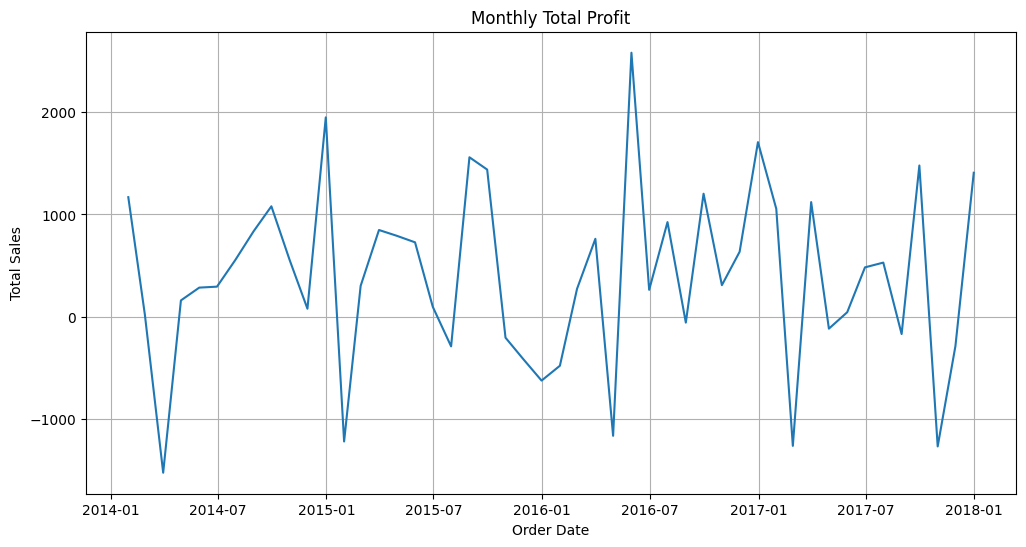

In [11]:
# Plot Sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_agg_overall.index, monthly_agg_overall['Profit'])
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Monthly Total Profit')
plt.grid(True)
plt.show()

### Is there any autocorrelation?

<Figure size 1200x600 with 0 Axes>

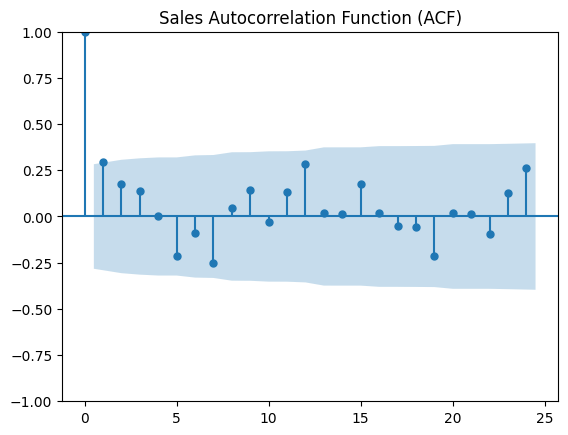

In [12]:
#Autocorrelation for Sales

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

#Calculate Autocorrelation
lag_acf = acf(monthly_agg_overall['Sales'], nlags=24)

# Plot autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(monthly_agg_overall['Sales'], lags=24)
plt.title('Sales Autocorrelation Function (ACF)')
plt.show()

<Figure size 1200x600 with 0 Axes>

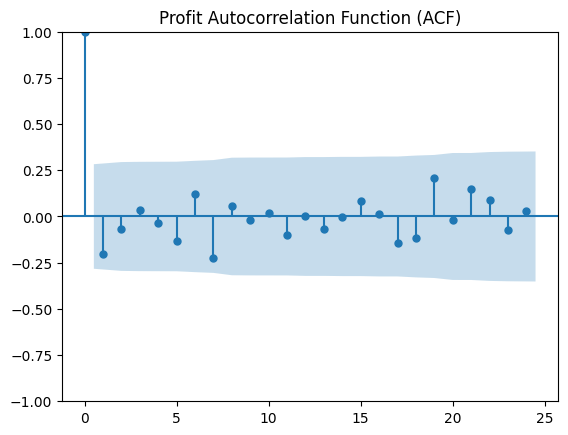

In [13]:
# Autocorrelation for Profit

# Calculate autocorrelation and partial autocorrelation
lag_acf = acf(monthly_agg_overall['Profit'], nlags=24)

# Plot autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(monthly_agg_overall['Profit'], lags=24)
plt.title('Profit Autocorrelation Function (ACF)')
plt.show()

### Check Stationarity with ADF Test

In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(monthly_agg_overall['Sales'])

# Print ADF test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if result[1] <= 0.05:
    print("The series is likely stationary.")
else:
    print("The series is likely non-stationary.")

ADF Statistic: -4.872170
p-value: 0.000039
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
The series is likely stationary.


## Checking Total Sales per Region

In [15]:
region_agg = df.groupby('Region')[['Sales','Discount','Profit','Quantity']].sum().reset_index()
region_agg.sort_values('Sales',ascending=False).head()

,Region,Sales,Discount,Profit,Quantity
3,West,252612.7435,92.90,11504.9503,2696
1,East,208291.2040,92.60,3046.1658,2214
0,Central,163797.1638,143.04,-2871.0494,1827
2,South,117298.6840,40.35,6771.2061,1291


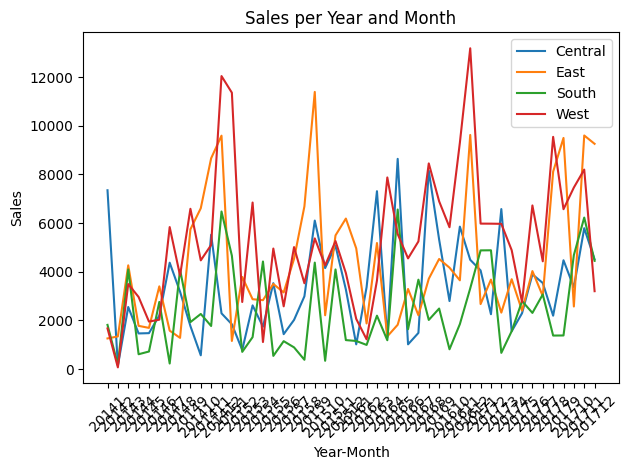

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'Month' and 'Year' columns
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

monthly_agg = df.groupby(['Order Year', 'Order Month','Region'])[['Sales']].sum().reset_index()
monthly_agg.head()

# Region: Central, East, South, West

for i in monthly_agg['Region'].unique():
    plot_data = monthly_agg[monthly_agg['Region'] == i]
    plt.plot(plot_data['Order Year'].astype(str) + plot_data['Order Month'].astype(str), plot_data['Sales'], label = i )

# plot_data = monthly_agg[monthly_agg['Region'] == 'West']
# plt.plot(plot_data['Order Year'].astype(str) + plot_data['Order Month'].astype(str), plot_data['Sales'])

plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Sales per Year and Month')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Sales per Sub-Category

In [17]:
subcat_agg = df.groupby('Sub-Category')[['Sales','Discount','Profit','Quantity']].sum().reset_index()
subcat_agg.sort_values('Sales',ascending=False).head()

,Sub-Category,Sales,Discount,Profit,Quantity
1,Chairs,328449.1030,105.00,26590.1663,2356
3,Tables,206965.5320,83.35,-17725.4811,1241
0,Bookcases,114879.9963,48.14,-3472.5560,868
2,Furnishings,91705.1640,132.40,13059.1436,3563


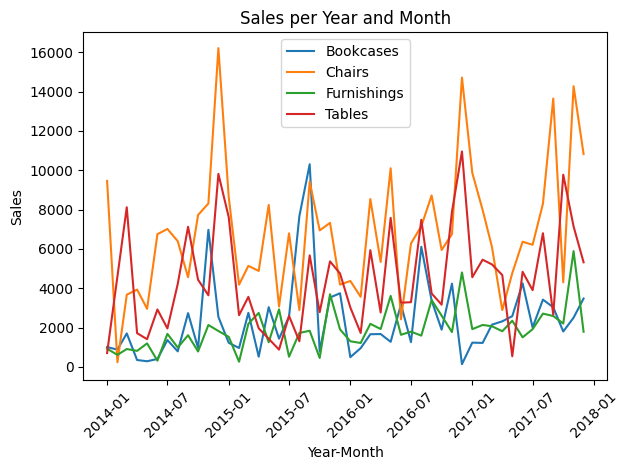

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'Month' and 'Year' columns
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

monthly_agg = df.groupby(['Order Year', 'Order Month','Sub-Category'])[['Sales']].sum().reset_index()
monthly_agg.head()

for i in monthly_agg['Sub-Category'].unique():
  plot_data = monthly_agg[monthly_agg['Sub-Category'] == i]
  plt.plot(pd.to_datetime(plot_data['Order Year'].astype(str) + '-' + plot_data['Order Month'].astype(str) + '-01'), plot_data['Sales'], label = i )

plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Sales per Year and Month')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Profit per Region

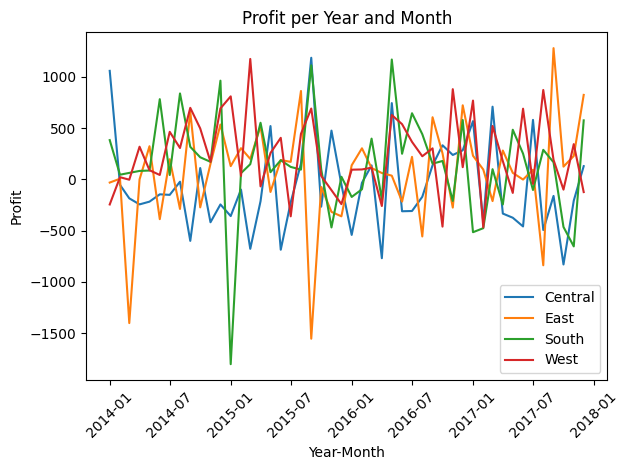

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'Month' and 'Year' columns
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

monthly_agg = df.groupby(['Order Year', 'Order Month','Region'])[['Profit']].sum().reset_index()
monthly_agg.head()

# Region: Central, East, South, West

for i in monthly_agg['Region'].unique():
    plot_data = monthly_agg[monthly_agg['Region'] == i]
    plt.plot(pd.to_datetime(plot_data['Order Year'].astype(str) + '-' + plot_data['Order Month'].astype(str) + '-01'), plot_data['Profit'], label = i )

# plot_data = monthly_agg[monthly_agg['Region'] == 'Central']
# plt.plot(plot_data['Order Year'].astype(str) + plot_data['Order Month'].astype(str), plot_data['Sales'])

plt.xlabel('Year-Month')
plt.ylabel('Profit')
plt.title('Profit per Year and Month')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Profit per Sub-Category

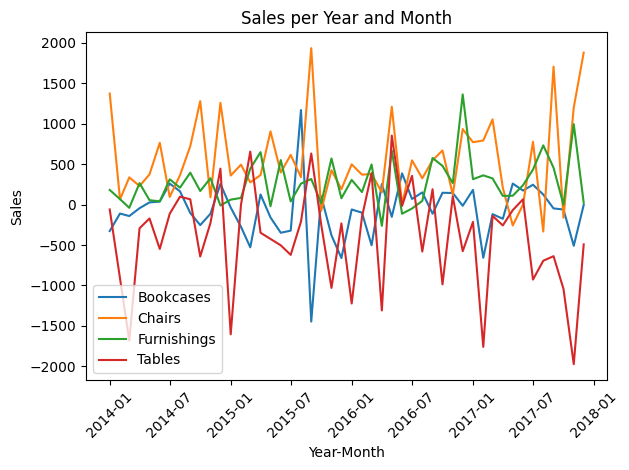

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'Month' and 'Year' columns
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

monthly_agg = df.groupby(['Order Year', 'Order Month','Sub-Category'])[['Profit']].sum().reset_index()
monthly_agg.head()

# Region: Central, East, South, West

for i in monthly_agg['Sub-Category'].unique():
    plot_data = monthly_agg[monthly_agg['Sub-Category'] == i]
    plt.plot(pd.to_datetime(plot_data['Order Year'].astype(str) + '-' + plot_data['Order Month'].astype(str) + '-01'), plot_data['Profit'], label = i )

# plot_data = monthly_agg[monthly_agg['Region'] == 'Central']
# plt.plot(plot_data['Order Year'].astype(str) + plot_data['Order Month'].astype(str), plot_data['Sales'])

plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Sales per Year and Month')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [21]:
monthly_agg['Cumulative Sum'] = monthly_agg.groupby('Sub-Category')['Profit'].cumsum()
monthly_agg.head(10)

,Order Year,Order Month,Sub-Category,Profit,Cumulative Sum
0,2014,1,Bookcases,-326.7848,-326.7848
1,2014,1,Chairs,1374.1552,1374.1552
2,2014,1,Furnishings,181.3967,181.3967
3,2014,1,Tables,-59.6796,-59.6796
4,2014,2,Bookcases,-110.4900,-437.2748
5,2014,2,Chairs,64.7568,1438.9120
6,2014,2,Furnishings,67.7529,249.1496
7,2014,3,Bookcases,-141.2250,-578.4998
8,2014,3,Chairs,336.9505,1775.8625
9,2014,3,Furnishings,-39.3814,209.7682
